# **CODIGO INTERFAZ TFM**
---
- **Diseño e implementación de modelos de Inteligencia Artificial para la identificación temprana de pacientes con riesgo de sufrir ataques cardíacos**
---
- **Elaborado por Jon Maestre Escobar**
- **Máster Universitario en Inteligencia Artificial**
- **Universidad Alfonso X El Sabio**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

heartAttackPrediction_India = pd.read_csv('../Codigo/heart_attack_prediction_india.csv')
heartAttackPrediction_India.fillna(0, inplace=True)
heartAttackPrediction_India.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [2]:
# Variables categóricas binarias (0/1)
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Variables numéricas continuas
numeric_vars = [
    'Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
    'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level',
    'Emergency_Response_Time', 'Annual_Income'
]

---
---
---
---

### **Variable Alto Riesgo Clinico de Ataque Cardiaco**

In [3]:
# Convertir variables binarias a 1/0
binarias = ['Heart_Attack_History', 'Heart_Attack_Risk', 'Hypertension', 'Diabetes', 'Obesity',
            'Family_History', 'Smoking', 'Alcohol_Consumption', 'Air_Pollution_Exposure']
heartAttackPrediction_India[binarias] = heartAttackPrediction_India[binarias].replace({'Yes': 1, 'No': 0})

# Crear columnas auxiliares con condiciones numéricas discretizadas
heartAttackPrediction_India['Cond_Colesterol_Alto'] = (heartAttackPrediction_India['Cholesterol_Level'] >= 240).astype(int)
heartAttackPrediction_India['Cond_Tension_Sistolica'] = (heartAttackPrediction_India['Systolic_BP'] >= 140).astype(int)
heartAttackPrediction_India['Cond_Tension_Diastolica'] = (heartAttackPrediction_India['Diastolic_BP'] >= 90).astype(int)
heartAttackPrediction_India['Cond_Dieta_Mala'] = (heartAttackPrediction_India['Diet_Score'] < 7).astype(int)
heartAttackPrediction_India['Cond_Estres_Alto'] = (heartAttackPrediction_India['Stress_Level'] > 7).astype(int)
heartAttackPrediction_India['Cond_Edad_Avanzada'] = (heartAttackPrediction_India['Age'] > 60).astype(int)

# Sumar factores de riesgo (binarios + numéricos)
factores_totales = heartAttackPrediction_India[
    ['Hypertension', 'Diabetes', 'Obesity', 'Family_History', 'Smoking', 'Alcohol_Consumption',
     'Air_Pollution_Exposure', 'Cond_Colesterol_Alto', 'Cond_Tension_Sistolica',
     'Cond_Tension_Diastolica', 'Cond_Dieta_Mala', 'Cond_Estres_Alto', 'Cond_Edad_Avanzada']
].sum(axis=1)

# Definir variable de alto riesgo clínico
heartAttackPrediction_India['High_Clinical_Risk'] = (
    (heartAttackPrediction_India['Heart_Attack_History'] == 1) |
    (factores_totales >= 6)
).astype(int)

heartAttackPrediction_India['High_Clinical_Risk'].value_counts()

High_Clinical_Risk
0    6048
1    3952
Name: count, dtype: int64

In [4]:
heartAttackPrediction_India.to_csv('HeartAttackPredictionIndia_Updated.csv', index=False)

In [5]:
HeartAttackPredictionIndia_Updated = pd.read_csv('../Codigo/HeartAttackPredictionIndia_Updated.csv')
HeartAttackPredictionIndia_Updated.fillna(0, inplace=True)
HeartAttackPredictionIndia_Updated.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Annual_Income,Health_Insurance,Heart_Attack_Risk,Cond_Colesterol_Alto,Cond_Tension_Sistolica,Cond_Tension_Diastolica,Cond_Dieta_Mala,Cond_Estres_Alto,Cond_Edad_Avanzada,High_Clinical_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,611025,0,0,1,0,1,0,0,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,174527,0,0,1,0,1,1,0,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,1760112,1,0,1,0,1,1,1,1,1
3,4,Odisha,58,Male,1,0,1,0,0,1,...,1398213,0,0,0,0,0,0,0,0,1
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,97987,0,1,1,1,1,1,1,0,0


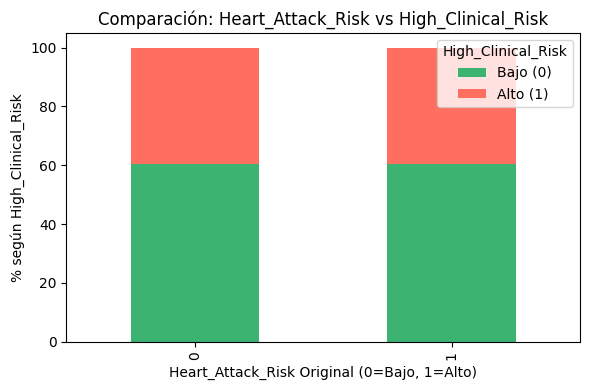

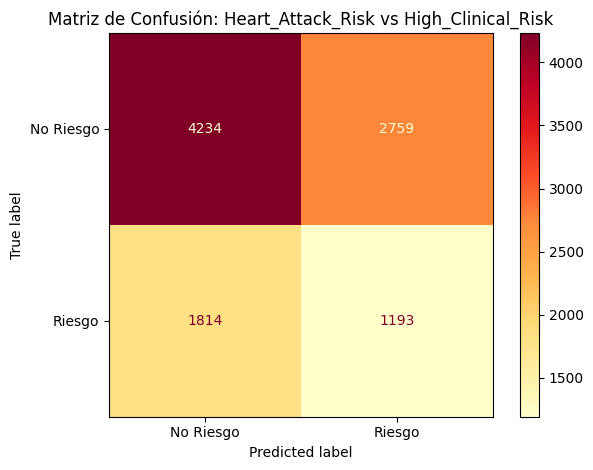

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualización comparativa con la etiqueta original 
fig, ax = plt.subplots(figsize=(6, 4))
comparacion = pd.crosstab(heartAttackPrediction_India['Heart_Attack_Risk'], heartAttackPrediction_India['High_Clinical_Risk'], normalize='index') * 100
comparacion.plot(kind='bar', stacked=True, color=['#3CB371', '#FF6F61'], ax=ax)
plt.title('Comparación: Heart_Attack_Risk vs High_Clinical_Risk')
plt.xlabel('Heart_Attack_Risk Original (0=Bajo, 1=Alto)')
plt.ylabel('% según High_Clinical_Risk')
plt.legend(['Bajo (0)', 'Alto (1)'], title='High_Clinical_Risk')
plt.tight_layout()
plt.show()

# Matriz de confusión entre ambas etiquetas 
y_true = heartAttackPrediction_India['Heart_Attack_Risk']
y_pred = heartAttackPrediction_India['High_Clinical_Risk']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Riesgo', 'Riesgo'])
disp.plot(cmap='YlOrRd')
plt.title('Matriz de Confusión: Heart_Attack_Risk vs High_Clinical_Risk')
plt.tight_layout()
plt.show()

---
---
---
---

### **MODELO MACHINE LEARNING EMPLEADO**

Fitting 3 folds for each of 25 candidates, totalling 75 fits

XGBoost - Evaluación final
AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1210    0]
 [   0  790]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Mejores hiperparámetros: {'colsample_bytree': 0.9439761626945282, 'learning_rate': 0.14606150771755597, 'max_depth': 3, 'n_estimators': 266, 'subsample': 0.6053059844639466}


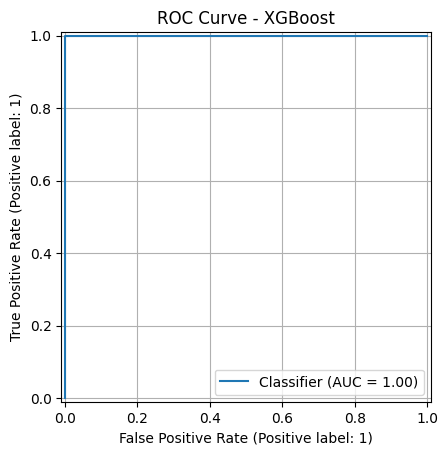

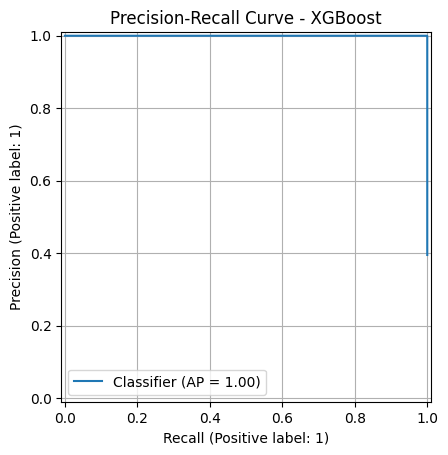


Modelo, scaler y columnas guardados correctamente.


In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

# ----------------------------
# 1. PREPROCESADO
# ----------------------------
X = HeartAttackPredictionIndia_Updated.drop(columns=['Heart_Attack_Risk', 'High_Clinical_Risk'])
y = HeartAttackPredictionIndia_Updated['High_Clinical_Risk']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Guardar columnas para la futura predicción
columnas_modelo = X.columns.tolist()

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# ----------------------------
# 2. OPTIMIZACIÓN DE XGBOOST
# ----------------------------
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=42
)

search.fit(X_train_bal, y_train_bal)
mejor_modelo = search.best_estimator_

# ----------------------------
# 3. EVALUACIÓN
# ----------------------------
y_pred_prob = mejor_modelo.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nXGBoost - Evaluación final")
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Mejores hiperparámetros:", search.best_params_)

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('ROC Curve - XGBoost')
plt.grid(True)
plt.show()

# PR Curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob)
plt.title('Precision-Recall Curve - XGBoost')
plt.grid(True)
plt.show()

# ----------------------------
# 4. GUARDAR MODELO, SCALER Y COLUMNAS
# ----------------------------
joblib.dump(mejor_modelo, "modelo_xgboost.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(columnas_modelo, "columnas_modelo.pkl")
print("\nModelo, scaler y columnas guardados correctamente.")


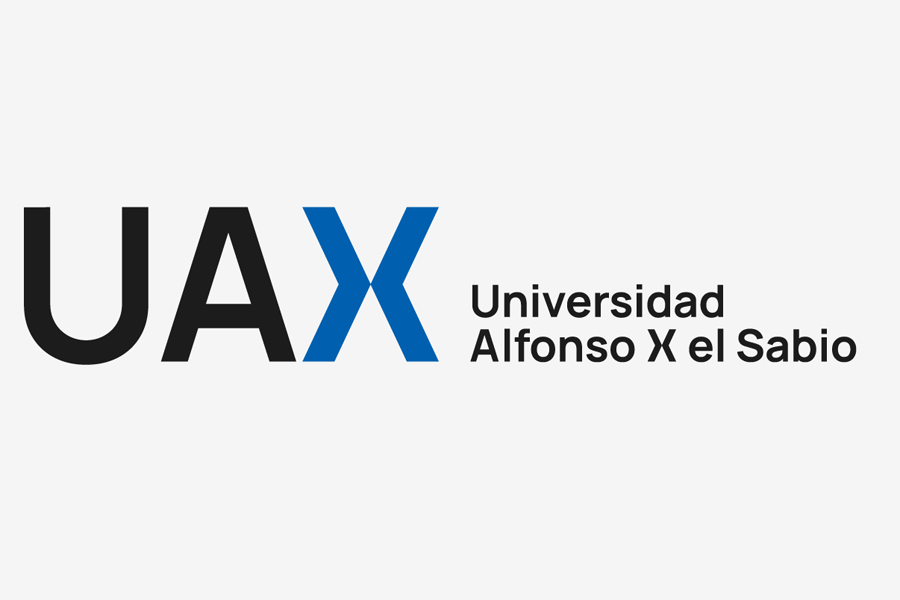

In [8]:
import base64
from IPython.display import HTML

image_path = "uax_logo.png"  
with open(image_path, "rb") as img_file:
    encoded_logo = base64.b64encode(img_file.read()).decode()

# HTML de cabecera visual con logo y estilo mejorado
html_header = f"""
<div style="display:flex;align-items:center;justify-content:space-between;background-color:#002B5B;padding:1em;border-radius:10px;margin-bottom:2em">
    <img src="data:image/png;base64,{encoded_logo}" alt="UAX Logo" style="height:80px;">
    <h1 style="color:white;margin:0 auto;font-family:sans-serif;">Sistema de Predicción de Riesgo Cardiovascular mediante Inteligencia Artificial</h1>
</div>
"""

HTML(html_header)

SystemExit: 0

RuntimeError: wrapped C/C++ object of type MplCanvas has been deleted

<Figure size 1154x462 with 1 Axes>

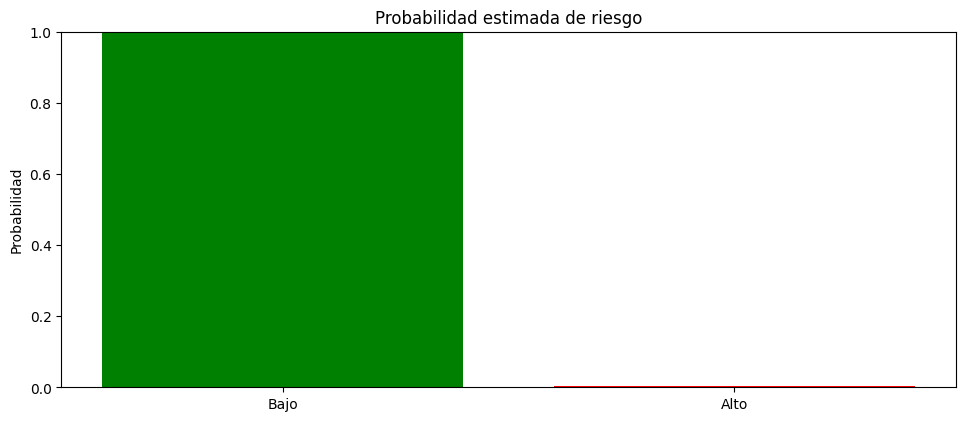

In [7]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyQt5.QtWidgets import (
    QApplication, QMainWindow, QWidget, QVBoxLayout, QHBoxLayout, QPushButton,
    QLabel, QComboBox, QTextEdit, QScrollArea, QSizePolicy
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import joblib

# ------------------------
# Cargar datos y modelo
# ------------------------
df = pd.read_csv("HeartAttackPredictionIndia_Updated.csv") 
model = joblib.load("modelo_xgboost.pkl")  # Mi modelo XGBoost entrenado
scaler = joblib.load("scaler.pkl")         # Escalador usado en el entrenamiento

# Cargar columnas usadas durante el entrenamiento
input_cols = joblib.load("columnas_modelo.pkl")  

# Preprocesar datos actuales
df = df.drop(columns=['High_Clinical_Risk', 'State_Name'], errors='ignore')
df_dummies = pd.get_dummies(df, drop_first=True)

# Reindexar asegurando el mismo orden y presencia de columnas
X = df_dummies.reindex(columns=input_cols, fill_value=0)

# Escalar
X_scaled = scaler.transform(X)

# ID únicos de pacientes
unique_ids = df.index.astype(str).tolist() 

# ------------------------
# Canvas para gráficos
# ------------------------
class MplCanvas(FigureCanvas):
    def __init__(self, parent=None):
        self.fig, self.ax = plt.subplots()
        super().__init__(self.fig)
        self.setParent(parent)

# ------------------------
# Ventana principal
# ------------------------
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Predicción de Riesgo Cardiaco - XGBoost")
        self.setGeometry(100, 100, 1200, 800)

        main_widget = QWidget()
        main_layout = QVBoxLayout(main_widget)
        self.setCentralWidget(main_widget)

        # Barra de selección
        top_layout = QHBoxLayout()
        label = QLabel("Selecciona un paciente:")
        label.setFont(QFont('Arial', 12))
        top_layout.addWidget(label)

        self.combo = QComboBox()
        self.combo.addItems(unique_ids)
        self.combo.setFixedWidth(200)
        top_layout.addWidget(self.combo)

        predict_button = QPushButton("Predecir")
        predict_button.clicked.connect(self.predict)
        top_layout.addWidget(predict_button)

        exit_button = QPushButton("Salir")
        exit_button.clicked.connect(self.close)
        top_layout.addWidget(exit_button)

        main_layout.addLayout(top_layout)

        # Área de contenido desplazable
        scroll = QScrollArea()
        scroll.setWidgetResizable(True)
        main_layout.addWidget(scroll)

        self.content = QWidget()
        self.layout = QVBoxLayout(self.content)
        scroll.setWidget(self.content)

    def predict(self):
        self.clear_layout()

        idx = int(self.combo.currentText())
        row = X_scaled[idx].reshape(1, -1)

        prob = model.predict_proba(row)[0][1]
        pred = int(prob > 0.5)

        # Mostrar predicción
        result_text = f"🧠 Riesgo cardíaco estimado: {'ALTO' if pred else 'BAJO'}\nProbabilidad: {prob:.4f}"
        label_result = QLabel(result_text)
        label_result.setFont(QFont('Arial', 16, QFont.Bold))
        label_result.setAlignment(Qt.AlignCenter)
        label_result.setStyleSheet("color: red;" if pred else "color: green;")
        self.layout.addWidget(label_result)

        # Mostrar características del paciente
        details = QTextEdit()
        details.setFont(QFont('Courier', 10))
        details.setReadOnly(True)
        # Extraer fila original con nombres legibles (antes de dummies)
        raw_row = df.iloc[idx]

        # Eliminar columnas dummies irrelevantes o que valen 0
        raw_row_filtered = raw_row[~raw_row.index.str.startswith("State_Name_")]

        # Mostrar solo columnas con valores significativos o nombres limpios
        info = raw_row_filtered[raw_row_filtered != 0].to_string()
        details.setText(f"🩺 Datos del paciente:\n\n{info}")
        self.layout.addWidget(details)

        # Mostrar gráfico de probabilidad
        canvas = MplCanvas(self)
        canvas.ax.bar(["Bajo", "Alto"], [1 - prob, prob], color=["green", "red"])
        canvas.ax.set_title("Probabilidad estimada de riesgo")
        canvas.ax.set_ylim(0, 1)
        canvas.ax.set_ylabel("Probabilidad")
        self.layout.addWidget(canvas)

    def clear_layout(self):
        for i in reversed(range(self.layout.count())):
            widget_to_remove = self.layout.itemAt(i).widget()
            self.layout.removeWidget(widget_to_remove)
            widget_to_remove.deleteLater()

# ------------------------
# Lanzar aplicación
# ------------------------
if __name__ == "__main__":
    app = QApplication(sys.argv)
    main_win = MainWindow()
    main_win.show()
    sys.exit(app.exec_())